<a href="https://colab.research.google.com/github/kseniia56/Python-in-Data-Analytics/blob/main/Finall_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Understanding and Data Cleaning

There are 3 tables in the database:
* events $-$ this table stores data about sales for several years
* products $-$ this table stores data about product categories and their codes
* countries $-$ this table stores data about countries, regions and their codes

Read data using Pandas.

In [32]:
products = pd.read_csv("/content/drive/MyDrive/Finall project/products.csv")
countries = pd.read_csv("/content/drive/MyDrive/Finall project/countries.csv")
events = pd.read_csv("/content/drive/MyDrive/Finall project/events.csv")

### Events

In [33]:
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


We see that some values аre missing in the "Country Code" and "Units Sold" columns.

In [34]:
events[events["Country Code"].isnull()]

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
13,104548490,1/1/2014,1/5/2014,M,NaN,7331,Online,7076.0,255.28,159.42
26,117929494,1/24/2015,3/2/2015,H,NaN,4594,Offline,6813.0,9.33,6.92
29,118859469,6/2/2011,7/1/2011,L,NaN,8969,Offline,2013.0,152.58,97.44
43,126948583,5/24/2017,7/9/2017,C,NaN,7331,Online,5762.0,255.28,159.42
...,...,...,...,...,...,...,...,...,...,...
1213,919922006,8/27/2011,9/18/2011,L,NaN,4594,Online,4219.0,9.33,6.92
1220,922564303,3/17/2017,4/2/2017,L,NaN,7940,Offline,6134.0,668.27,502.54
1250,941061675,3/8/2017,3/20/2017,M,NaN,5988,Offline,9917.0,154.06,90.93
1296,975080668,7/23/2017,8/20/2017,C,NaN,5988,Offline,6893.0,154.06,90.93


Replace empty values ​​with "Unknown".

In [35]:
events.loc[events["Country Code"].isnull(), "Country Code"] = "Unknown"
events[events["Country Code"].isnull()]

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost


In [36]:
events[events["Units Sold"].isnull()]

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
183,217165648,5/20/2014,6/8/2014,M,ESP,8875,Offline,NaN,421.89,364.69
319,309655511,5/5/2014,5/21/2014,C,HRV,3127,Offline,NaN,81.73,56.67


Without additional information, further analysis will **not be possible**. So let's delete these two lines.

In [37]:
row_to_delete = events[events["Units Sold"].isnull()].index
events = events.drop(row_to_delete, axis=0)

Let's look at the "Sales Channel" column.

In [38]:
events["Sales Channel"].unique()

array(['Online', 'Offline', 'online'], dtype=object)

There is a problem with the same meaning written differently

In [39]:
events["Sales Channel"] = events["Sales Channel"].str.capitalize()
events["Sales Channel"].unique()

array(['Online', 'Offline'], dtype=object)

Сonvert dates

In [40]:
events['Order Date'] = events['Order Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
events['Ship Date'] = events['Ship Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))

In [41]:
events["Total Price"] = events["Units Sold"] * events["Unit Price"]
events["Total Cost"] = events["Units Sold"] * events["Unit Cost"]
events["Proceed"] = events["Total Price"] - events["Total Cost"]
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Price,Total Cost,Proceed
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68


In [42]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
 10  Total Price     1328 non-null   float64       
 11  Total Cost      1328 non-null   float64       
 12  Proceed         1328 non-null   float64       
dtypes: datetime64[ns](2), float64(6), int64(2), object(3)
memory usage: 145.2+ KB


### Products

In [43]:
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [44]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


There are no null data in the "products" table.

### Countries

In [45]:
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [46]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


We can see there are empty values. Let's find them.

In [47]:
countries[countries["alpha-2"].isnull()]

,name,alpha-2,alpha-3,region,sub-region
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


This is Namibia. In the "events" table, we use alpha-3, so this is not critical. But Namibia's alpha-2 is NA. Let's change that.

In [48]:
countries.loc[countries["alpha-2"].isnull(), "alpha-2"] = "NA"

In [49]:
countries[countries["region"].isnull()]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN


Antarctica is a special case. It does not belong to any country and is not divided into regions and subregions.

We will also add data for an unknown country.

In [72]:
new_row = {'name': 'Unknown', 'alpha-2': "Unknown", 'alpha-3': 'Unknown', 'region': 'Unknown', 'sub-region': 'Unknown'}
countries.loc[len(countries)] = new_row

In [73]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        250 non-null    object
 1   alpha-2     250 non-null    object
 2   alpha-3     250 non-null    object
 3   region      249 non-null    object
 4   sub-region  249 non-null    object
dtypes: object(5)
memory usage: 11.7+ KB


### Create new table for dates

In [51]:
dates = events[["Order ID", "Order Date", "Ship Date"]].copy()
dates['Delivery Time'] = (dates['Ship Date'] - dates['Order Date']).dt.days
dates['Year'] = dates['Order Date'].dt.year
dates['Month'] = dates['Order Date'].dt.strftime("%B")
dates['Weekday'] = dates['Order Date'].dt.strftime("%A")
dates

,Order ID,Order Date,Ship Date,Delivery Time,Year,Month,Weekday
0,100640618,2014-10-08,2014-10-18,10,2014,October,Wednesday
1,100983083,2016-08-11,2016-08-11,0,2016,August,Thursday
2,101025998,2014-07-18,2014-08-11,24,2014,July,Friday
3,102230632,2017-05-13,2017-06-13,31,2017,May,Saturday
4,103435266,2012-08-11,2012-09-18,38,2012,August,Saturday
...,...,...,...,...,...,...,...
1325,994504153,2017-01-10,2017-01-13,3,2017,January,Tuesday
1326,994978797,2014-12-05,2015-01-02,28,2014,December,Friday
1327,996754205,2010-09-20,2010-09-22,2,2010,September,Monday
1328,998043382,2010-06-15,2010-07-03,18,2010,June,Tuesday


## Exploratory Data Analysis

In [52]:
proceed = events["Proceed"].sum()
print("The company's income over the past few years is", proceed)

The company's income over the past few years is 501434459.0


In [53]:
pd.set_option('display.float_format', '{:.2f}'.format)
events["Proceed"].describe()

,Proceed
count,1328.00
mean,377586.19
std,369121.62
min,130.14
25%,84912.85
50%,274868.02
75%,547736.60
max,1700448.60


We list the 10 orders that brought us the **most profit**

In [54]:
events[events["Proceed"].isin(events['Proceed'].nlargest(10))].sort_values("Proceed", ascending=False)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Price,Total Cost,Proceed
289,291160714,2012-04-10,2012-05-26,H,AND,8293,Online,9780.00,437.20,263.33,4275816.00,2575367.40,1700448.60
350,337354791,2011-12-09,2012-01-28,L,NOR,8293,Offline,9634.00,437.20,263.33,4211984.80,2536921.22,1675063.58
718,576944720,2016-09-30,2016-10-09,L,ALB,8293,Offline,9619.00,437.20,263.33,4205426.80,2532971.27,1672455.53
419,385340154,2012-02-26,2012-03-18,M,DEU,8293,Offline,9569.00,437.20,263.33,4183566.80,2519804.77,1663762.03
912,694914710,2010-08-23,2010-09-25,C,ALB,8293,Offline,9560.00,437.20,263.33,4179632.00,2517434.80,1662197.20
1084,821131742,2015-12-09,2015-12-09,H,SMR,7940,Offline,9985.00,668.27,502.54,6672675.95,5017861.90,1654814.05
345,332353007,2010-10-06,2010-11-22,H,HUN,8293,Online,9495.00,437.20,263.33,4151214.00,2500318.35,1650895.65
349,336813628,2010-01-16,2010-02-23,C,SWE,8293,Offline,9492.00,437.20,263.33,4149902.40,2499528.36,1650374.04
1016,765101468,2014-03-14,2014-04-06,H,LVA,8293,Online,9382.00,437.20,263.33,4101810.40,2470562.06,1631248.34
648,526018369,2011-06-03,2011-06-21,M,Unknown,8293,Online,9379.00,437.20,263.33,4100498.80,2469772.07,1630726.73


We see that it is the same product with **code 8293**

We display 10 orders that brought us the **least profit**

In [55]:
events[events["Proceed"].isin(events['Proceed'].nsmallest(10))].sort_values("Proceed")

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Price,Total Cost,Proceed
126,182078921,2016-01-12,2016-02-14,H,FIN,4594,Offline,54.00,9.33,6.92,503.82,373.68,130.14
88,152746713,2010-05-02,2010-05-08,C,BIH,8681,Offline,2.00,651.21,524.96,1302.42,1049.92,252.50
829,640476596,2014-10-21,2014-10-24,H,ISL,4594,Online,112.00,9.33,6.92,1044.96,775.04,269.92
52,129902875,2014-03-21,2014-04-24,C,BGR,7940,Online,2.00,668.27,502.54,1336.54,1005.08,331.46
146,192589318,2012-11-01,2012-12-16,M,CZE,4594,Online,314.00,9.33,6.92,2929.62,2172.88,756.74
436,393858420,2012-08-14,2012-08-29,L,SVK,4594,Offline,314.00,9.33,6.92,2929.62,2172.88,756.74
764,601886260,2014-04-09,2014-05-27,C,FRA,4594,Offline,374.00,9.33,6.92,3489.42,2588.08,901.34
644,524972951,2012-12-22,2013-01-17,L,ROU,8875,Offline,17.00,421.89,364.69,7172.13,6199.73,972.40
771,605029380,2014-02-12,2014-02-18,H,FRA,4594,Offline,493.00,9.33,6.92,4599.69,3411.56,1188.13
63,138182103,2014-08-09,2014-08-16,C,NLD,8681,Online,10.00,651.21,524.96,6512.10,5249.60,1262.50


We see that it is mostly the same product with **code 4594**

In [56]:
category = events.groupby("Product ID")["Proceed"].agg(['count','median', 'min', 'max', 'sum'])
category = pd.merge(products, category, left_on="id", right_on="Product ID")
category.sort_values("sum", ascending=False)

,id,item_type,count,median,min,max,sum
9,8293,Cosmetics,114,722951.46,2955.79,1700448.60,92723306.17
4,8681,Office Supplies,123,647536.25,252.50,1262121.25,77977176.25
1,7940,Household,97,720594.04,331.46,1654814.05,72962466.77
7,7331,Baby Food,112,492480.75,4409.56,955532.48,53940997.16
2,2455,Clothes,105,436527.36,9033.12,734106.24,43431314.40
0,2103,Cereal,103,394048.32,4429.50,881470.50,41255034.15
6,5988,Vegetables,114,333926.13,1388.86,626060.21,36776002.72
8,8875,Meat,110,277048.20,972.40,568911.20,30337736.00
10,8969,Snacks,103,264065.46,9428.94,547485.06,27027422.40
11,3127,Personal Care,114,117644.17,1779.26,250574.94,13975410.68


<ipython-input-57-ed3311f006dd>:1: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(category.sort_values('median', ascending=False), x="median", y="item_type", kind='bar', palette=sns.color_palette("rocket", 1), hue="item_type", legend=False)


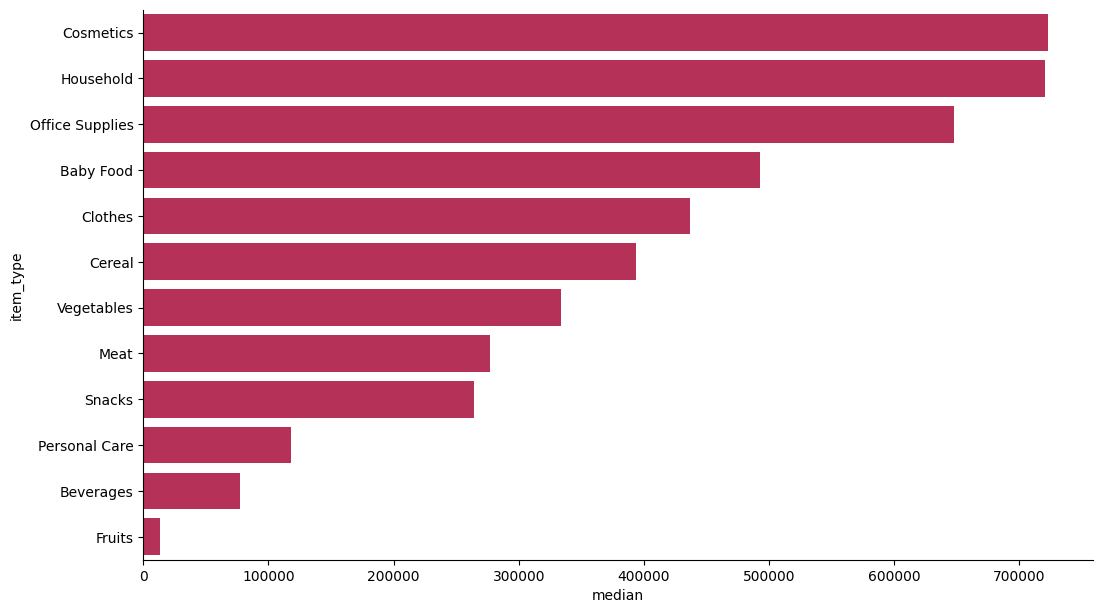

In [57]:
sns.catplot(category.sort_values('median', ascending=False), x="median", y="item_type", kind='bar', palette=sns.color_palette("rocket", 1), hue="item_type", legend=False)
plt.subplots_adjust(left=0.1, right=2, top=1.2, bottom=0.1)
plt.show()

We see that the most income comes from **Сosmetics** with product **code 8293**, and the least from fruits with **code 4594**

<ipython-input-58-6746ba38873f>:1: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(category.sort_values('count', ascending=False), x="count", y="item_type", kind='bar', palette=sns.color_palette("rocket", 1), hue="item_type", legend=False)


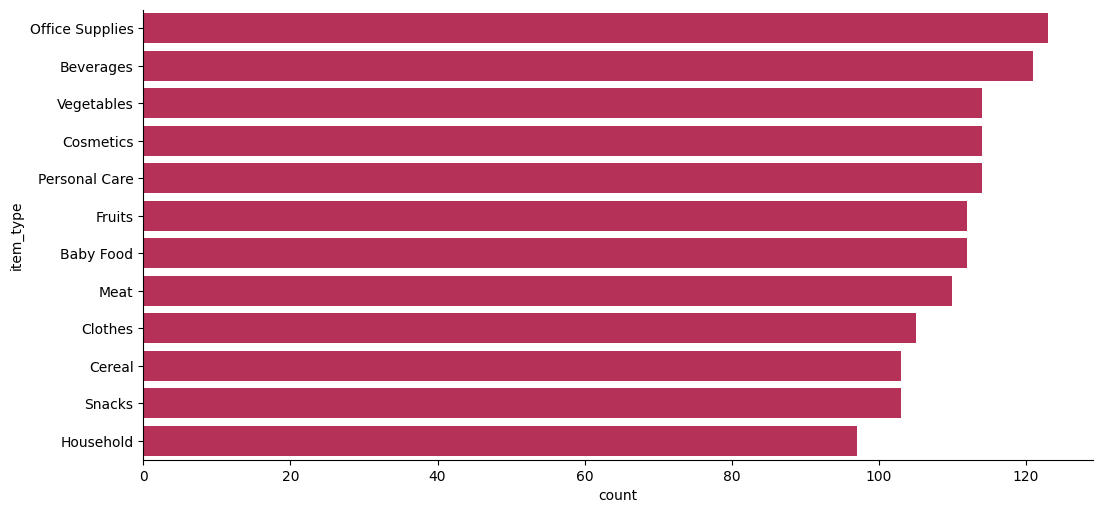

In [58]:
sns.catplot(category.sort_values('count', ascending=False), x="count", y="item_type", kind='bar', palette=sns.color_palette("rocket", 1), hue="item_type", legend=False)
plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
plt.show()

In terms of the number of orders, Cosmetics and Fruits are approximately in the middle of the list. The most ordered is Office Supplies.

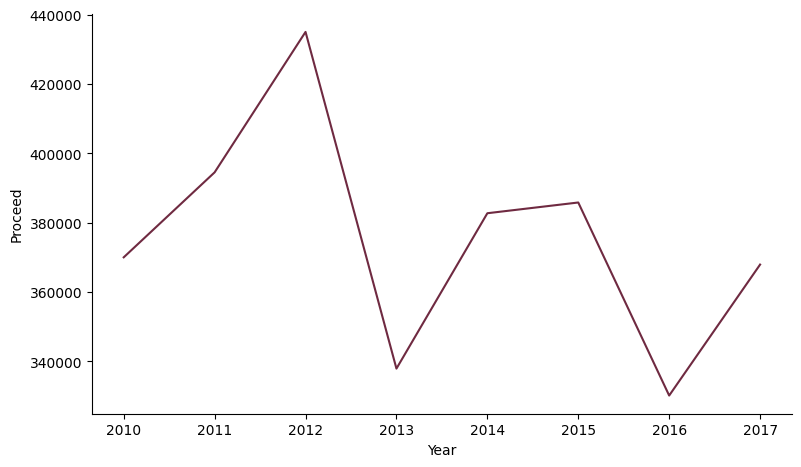

In [60]:
sns.relplot(pd.merge(events, dates, on="Order ID"), kind="line", x="Year", y="Proceed", errorbar=None, color="#6f2a41")
plt.subplots_adjust(left=0.1, right=1.5, top=0.9, bottom=0.1)
plt.show()

The company's income is quite **unstable**. In 2013 and 2016, there was a crisis.

<ipython-input-61-5b011c8271fb>:2: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(pd.merge(events, dates, on="Order ID"), kind="count", x="Month", palette = sns.color_palette("rocket", 1), order=order_month, hue="Month", legend=False)


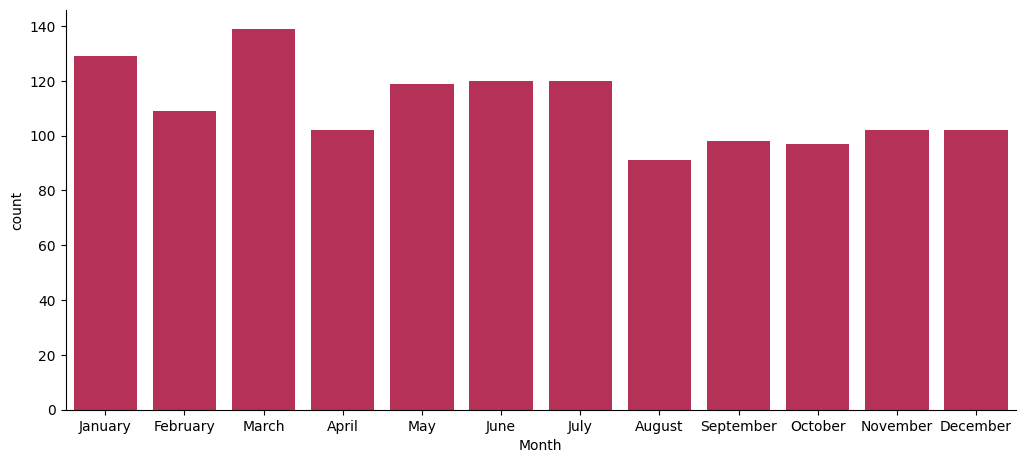

In [61]:
order_month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.catplot(pd.merge(events, dates, on="Order ID"), kind="count", x="Month", palette = sns.color_palette("rocket", 1), order=order_month, hue="Month", legend=False)
plt.subplots_adjust(left=0.1, right=2, top=0.9, bottom=0.1)
plt.show()

Customer activity increases significantly in March and January. Perhaps the number of events should be increased in these months.

<ipython-input-62-a209a5fe2c52>:3: UserWarning: 
The palette list has fewer values (1) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(temp.groupby("Month", as_index=False).sum("Proceed"), kind="bar", x="Month", y="Proceed", palette = sns.color_palette("rocket", 1), errorbar=None,  order=order_month, hue="Month", legend=False)


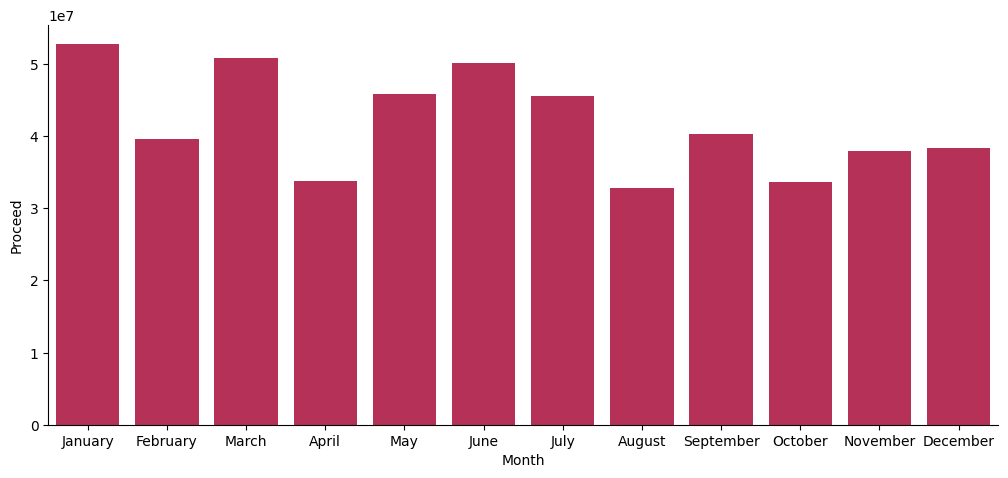

In [62]:
temp = pd.merge(events, dates[["Order ID", "Month"]], on="Order ID")
order = temp.groupby("Month")['Proceed'].sum().sort_values(ascending=False).index
sns.catplot(temp.groupby("Month", as_index=False).sum("Proceed"), kind="bar", x="Month", y="Proceed", palette = sns.color_palette("rocket", 1), errorbar=None,  order=order_month, hue="Month", legend=False)
plt.subplots_adjust(left=0.1, right=2, top=0.9, bottom=0.1)
plt.show()

We see that in March and January the highest income is also.

In autumn, clients are less active and income also decreases significantly. Perhaps this indicates the need to hold promotions during this season.

<ipython-input-63-7aee29d2c76c>:1: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(dates, kind="count", x="Weekday", palette = sns.color_palette("rocket", 1), order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], hue="Weekday", legend=False)


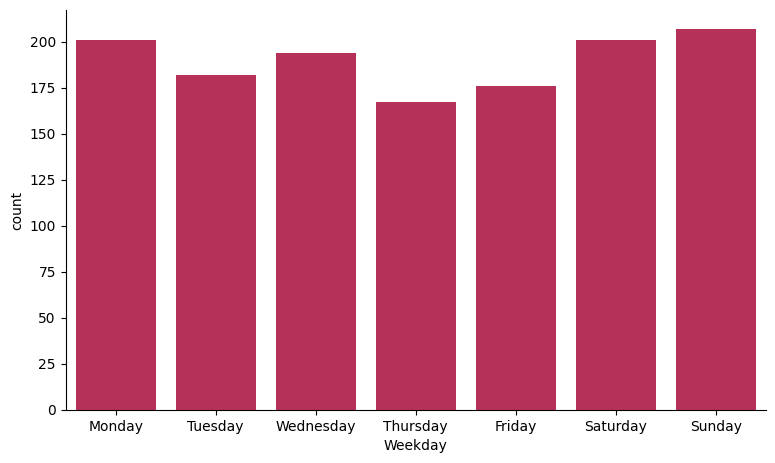

In [63]:
sns.catplot(dates, kind="count", x="Weekday", palette = sns.color_palette("rocket", 1), order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], hue="Weekday", legend=False)
plt.subplots_adjust(left=0.1, right=1.5, top=0.9, bottom=0.1)
plt.show()

Customer activity increases significantly on weekends. Since Thursday and Friday are less active, you may want to consider running special promotions or discounts to encourage activity on these days.

<ipython-input-64-bd09f9f757d0>:1: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(pd.merge(events, dates, on="Order ID"), kind="bar", x="Proceed", y="Weekday", palette = sns.color_palette("rocket", 1), order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], errorbar=None, hue="Weekday", legend=False)


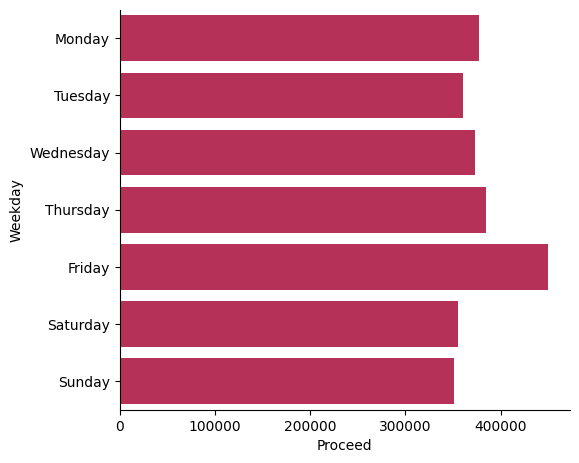

In [64]:
sns.catplot(pd.merge(events, dates, on="Order ID"), kind="bar", x="Proceed", y="Weekday", palette = sns.color_palette("rocket", 1), order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], errorbar=None, hue="Weekday", legend=False)
plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)
plt.show()

The highest revenue is on Fridays.

In [65]:
online = events[events["Sales Channel"] == "Online"]["Order ID"].count()
offline = events[events["Sales Channel"] == "Offline"]["Order ID"].count()
total_order = events["Order ID"].count()
print("Among them, " + str(round(online/total_order, 1) * 100) + "% are online and "
      + str(round(offline/total_order, 1) * 100) + "% offline")

Among them, 50.0% are online and 50.0% offline


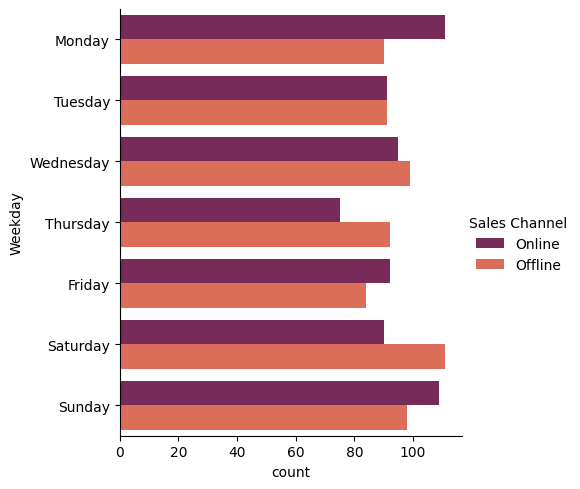

In [67]:
sns.catplot(pd.merge(events, dates, on="Order ID"), kind="count", y="Weekday", hue="Sales Channel", palette = sns.color_palette("rocket", 2), order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

On Thursday, offline orders prevail, it is recommended to conduct offline promotions. On Friday, online orders prevail, so it is advisable to focus on online sales channels.

In [68]:
print("Total number of countries", events["Country Code"].nunique())

Total number of countries 46


In [74]:
top_order_countries = events.groupby("Country Code")["Proceed"].agg(['count', 'median', 'min', 'max', 'sum'])
top_order_countries = pd.merge(countries[["name", "alpha-3", "region"]], top_order_countries, left_on="alpha-3", right_on="Country Code")
top_order_countries.sort_values("sum", ascending=False).head(10)

,name,alpha-3,region,count,median,min,max,sum
45,Unknown,Unknown,Unknown,82,283777.94,1935.23,1630726.73,27725423.94
1,Andorra,AND,Europe,40,194026.97,2369.03,1700448.60,15410036.63
43,Ukraine,UKR,Europe,33,338351.02,4166.25,1574045.11,14804925.74
26,Malta,MLT,Europe,32,363971.03,6752.82,1605863.32,14610127.88
36,San Marino,SMR,Europe,40,212122.07,14291.30,1654814.05,13792992.81
18,Hungary,HUN,Europe,25,452705.23,3508.96,1650895.65,13786231.03
30,Macedonia,MKD,Europe,32,354556.04,17062.80,1543112.03,13684099.95
10,Czech Republic,CZE,Europe,31,262226.40,756.74,1558690.65,13635593.78
35,Russia,RUS,Europe,32,273196.80,1785.24,1626901.59,13267682.64
6,Bosnia and Herzegovina,BIH,Europe,33,238771.68,252.50,1358098.57,13257602.77


In [79]:
top_order_countries.groupby("region")["count"].sum()

,count
region,
Asia,82
Europe,1164
Unknown,82


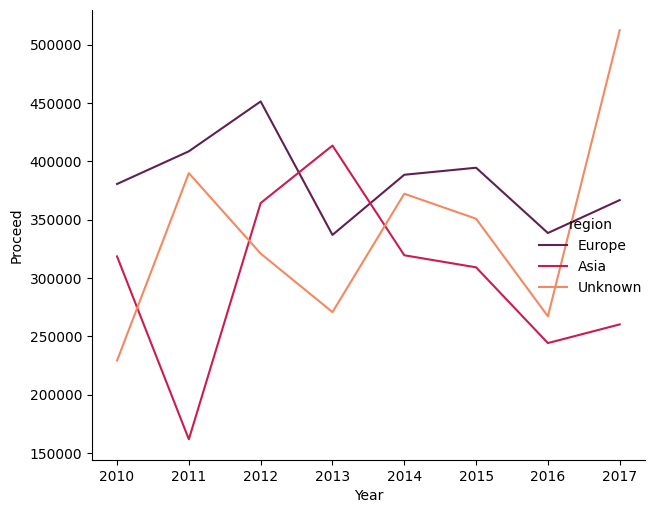

In [80]:
temp = pd.merge(events, dates[["Order ID", "Year"]], on="Order ID")
sns.relplot(pd.merge(countries, temp, left_on="alpha-3", right_on="Country Code"), x="Year", y="Proceed", hue="region", kind="line", errorbar=None, palette=sns.color_palette("rocket", 3))
plt.subplots_adjust(left=0.1, right=1, top=1, bottom=0.1)
plt.show()

We see that Europe has a more stable income. Asia has a crisis in 2011, but there is practically no impact of the crisis in 2013

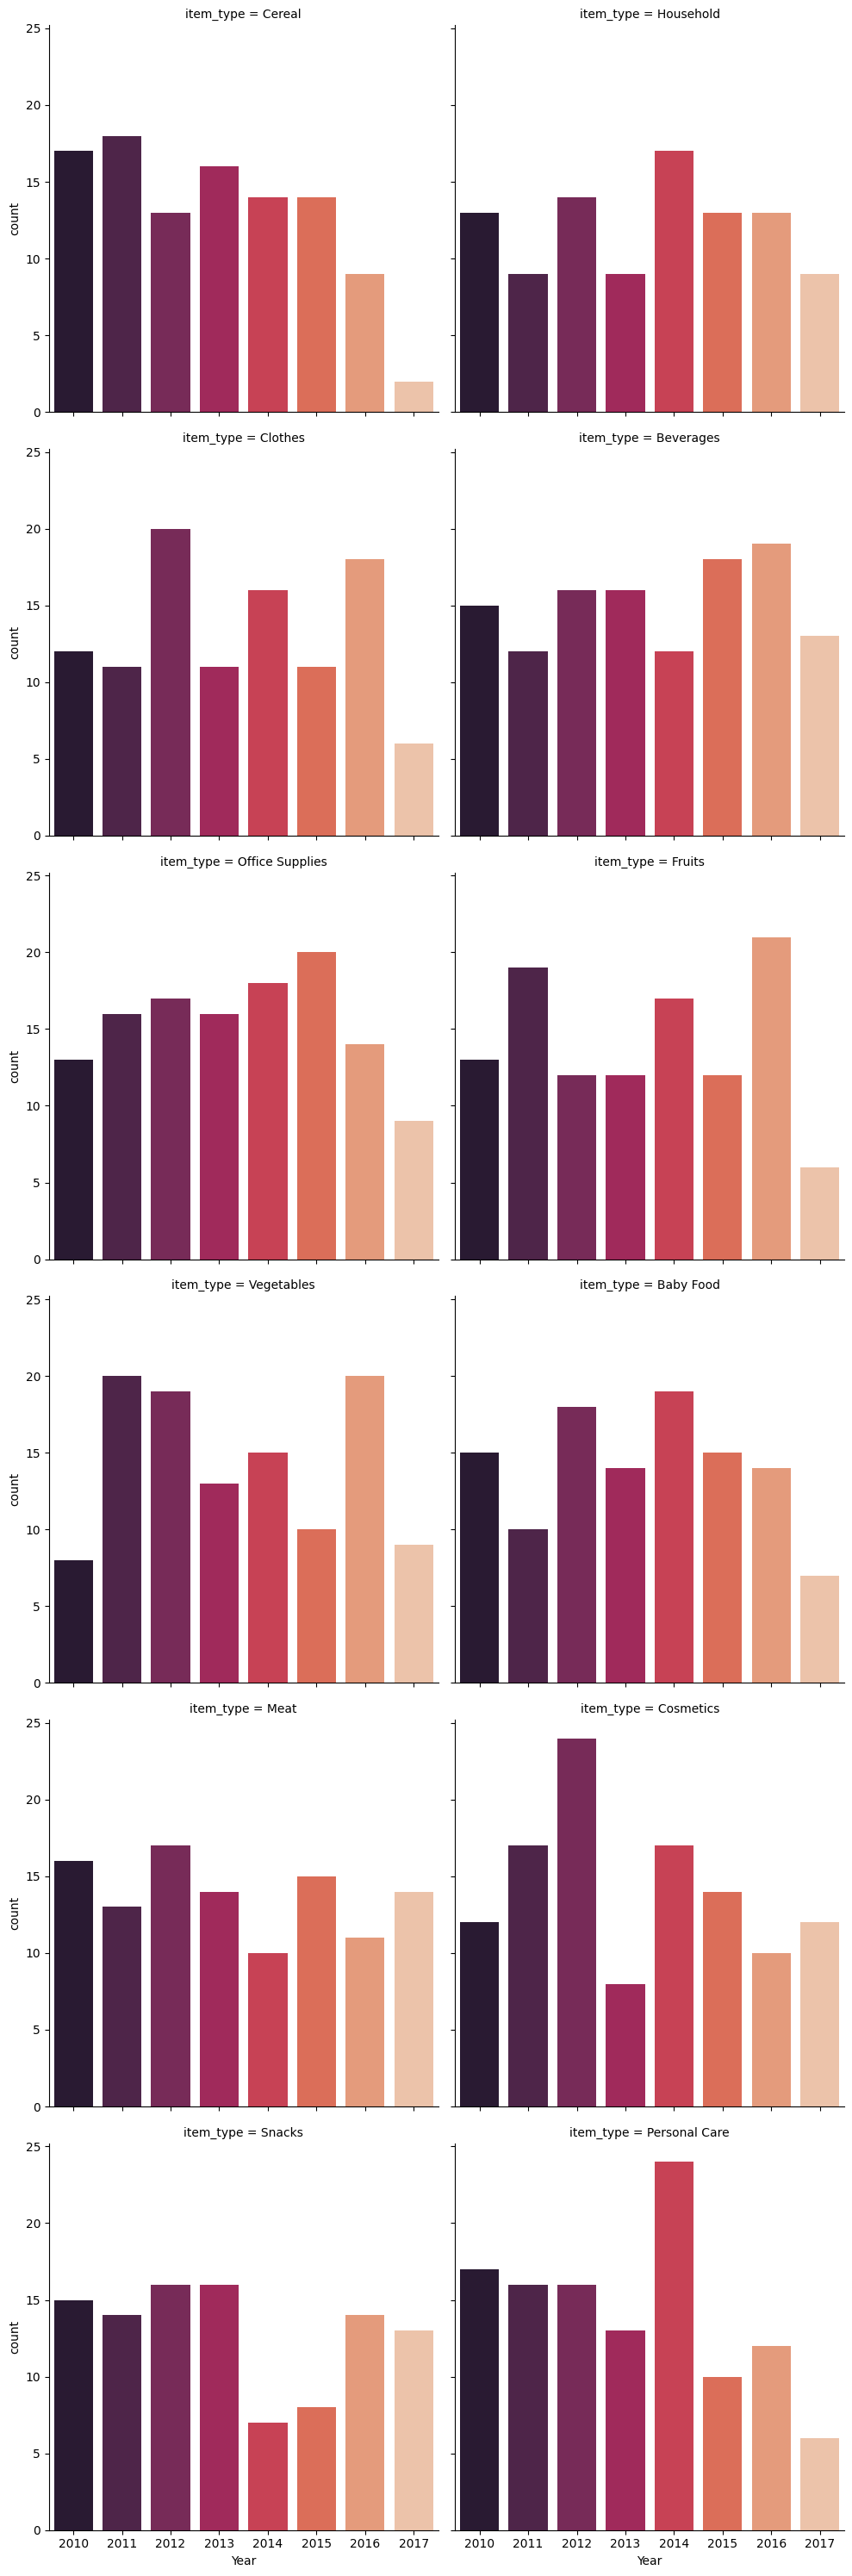

In [87]:
temp = pd.merge(events, products[["id", "item_type"]], left_on="Product ID", right_on="id")
sns.catplot(pd.merge(temp, dates[["Order ID", "Year"]], on="Order ID"), x="Year", col="item_type", col_wrap=2, kind="count", hue="Year", legend=False, errorbar=None, palette=sns.color_palette("rocket", 8))
plt.show()

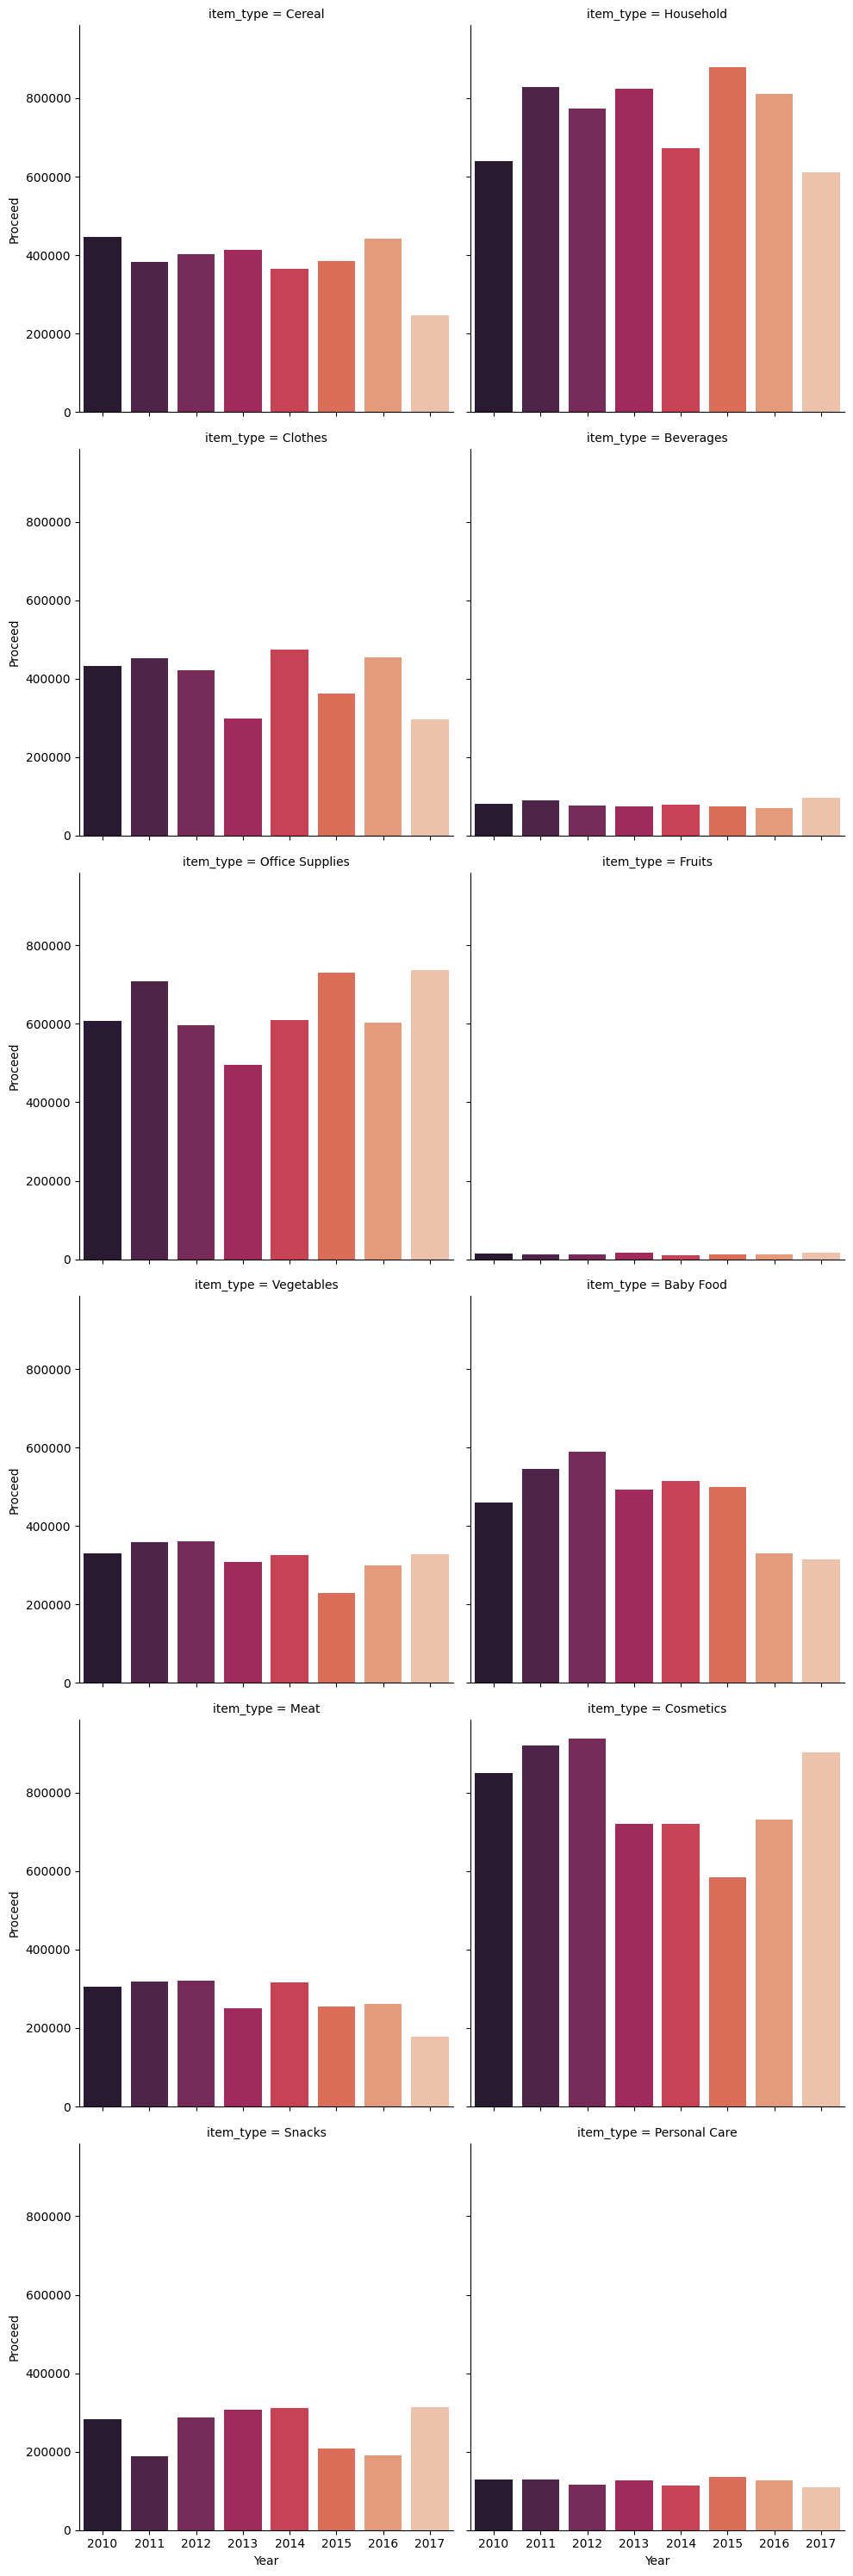

In [86]:
temp = pd.merge(events, products[["id", "item_type"]], left_on="Product ID", right_on="id")
sns.catplot(pd.merge(temp, dates[["Order ID", "Year"]], on="Order ID"), x="Year", y="Proceed", col="item_type", col_wrap=2, kind="bar", hue="Year", legend=False, errorbar=None, palette=sns.color_palette("rocket", 8))

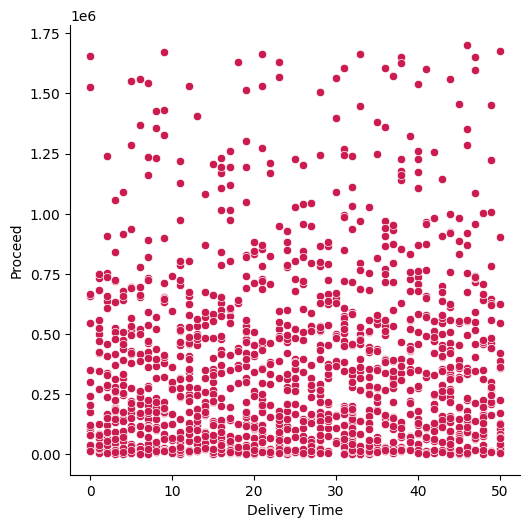

In [84]:
temp = pd.merge(events, dates[["Order ID", "Delivery Time"]], on="Order ID")
sns.relplot(temp, x="Delivery Time", y="Proceed", color=sns.color_palette("rocket", 1))
plt.subplots_adjust(left=0.1, right=1, top=1, bottom=0.1)
plt.show()

This indicates that there is no connection between delivery speed and price.

In [ ]:
temp[["Proceed", "Delivery Time"]].corr()

,Proceed,Delivery Time
Proceed,1.00,0.06
Delivery Time,0.06,1.00


The correlation confirms this

## ABC analysis


In [ ]:
temp = pd.merge(events, dates[["Order ID", "Year"]], on="Order ID")
proceed = temp[temp["Year"] == 2017]["Proceed"].sum()
temp = pd.merge(temp[temp["Year"] == 2017], products, left_on="Product ID", right_on="id")
abc = temp[["item_type", "Proceed"]].groupby("item_type").sum()

In [ ]:
abc = abc.sort_values("Proceed", ascending = False).copy()
abc["Fate"] = abc["Proceed"] / proceed * 100
abc["Accumulated Fate"] = abc["Fate"].cumsum()
abc

,Proceed,Fate,Accumulated Fate
item_type,,,
Cosmetics,10833318.09,27.78,27.78
Office Supplies,6632543.75,17.01,44.78
Household,5500910.16,14.11,58.89
Snacks,4088851.56,10.48,69.37
Vegetables,2953663.31,7.57,76.95
Meat,2500898.40,6.41,83.36
Baby Food,2204971.72,5.65,89.01
Clothes,1777615.20,4.56,93.57
Beverages,1267739.64,3.25,96.82


In [ ]:
def class_of_product(procent):
    if procent <= 80:
        return "A"
    elif 80 < procent <= 95:
        return "B"
    else:
        return "C"

In [ ]:
abc["Class"] = abc["Accumulated Fate"].apply(class_of_product)
abc

,Proceed,Fate,Accumulated Fate,Class
item_type,,,,
Cosmetics,10833318.09,27.78,27.78,A
Office Supplies,6632543.75,17.01,44.78,A
Household,5500910.16,14.11,58.89,A
Snacks,4088851.56,10.48,69.37,A
Vegetables,2953663.31,7.57,76.95,A
Meat,2500898.40,6.41,83.36,B
Baby Food,2204971.72,5.65,89.01,B
Clothes,1777615.20,4.56,93.57,B
Beverages,1267739.64,3.25,96.82,C


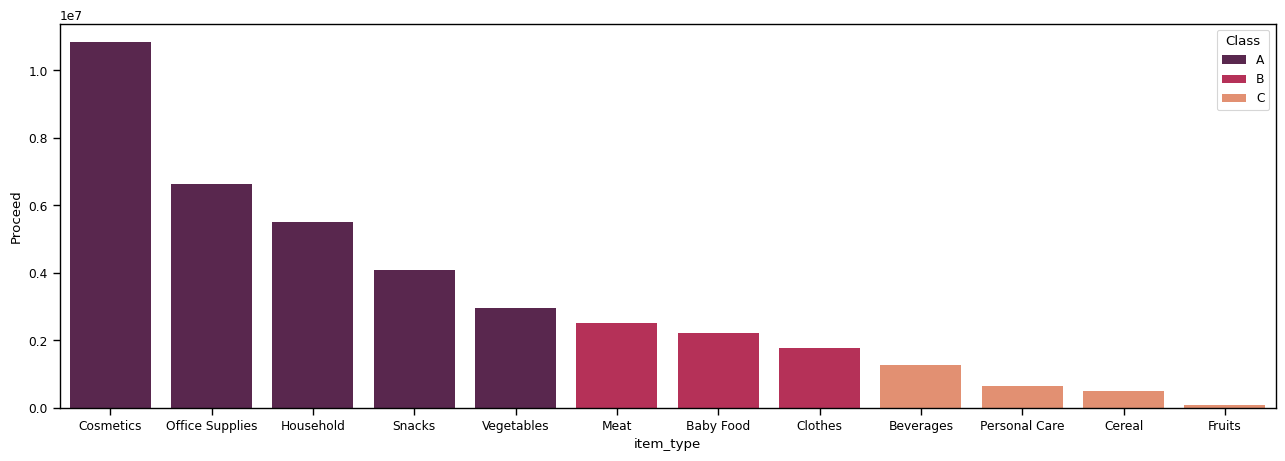

In [ ]:
sns.barplot(abc, x="item_type", y="Proceed", hue="Class", palette=sns.color_palette("rocket", 3))
plt.subplots_adjust(left=0.1, right=2, top=0.9, bottom=0.1)
plt.show()